In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import scienceplots
from tqdm import tqdm
%matplotlib inline

# Extend PATH Variable
import sys
sys.path.append("../../../../src/")

# NanoNets Simulation Tool
import nanonets
import nanonets_utils

# Plot Colors
blue_color  = '#348ABD'
red_color   = '#A60628'

In [2]:
voltages    = np.loadtxt('volt.csv')
time        = np.loadtxt('time.csv') 

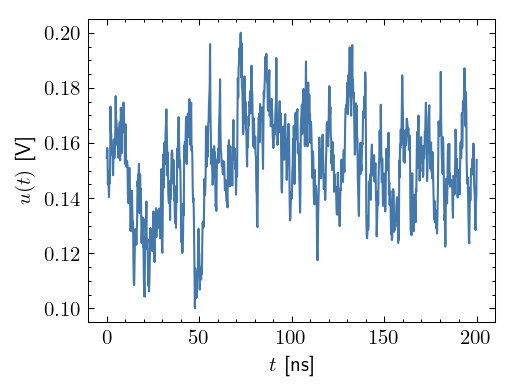

In [3]:
with plt.style.context(["science","bright"]):

    plt.figure(dpi=150)
    plt.plot(time*1e9, voltages[:,0])
    plt.xlabel("$t$ [ns]")
    plt.ylabel("$u(t)$ [V]")

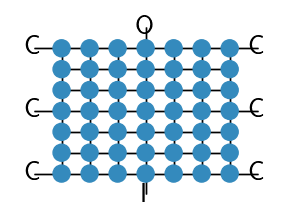

In [4]:
N_processes, network_topology, topology_parameter, eq_steps, np_info, res_info, T_val, save_th = nanonets_utils.load_time_params(folder="")
sim_class = nanonets.simulation(network_topology=network_topology, topology_parameter=topology_parameter, res_info=res_info, np_info=np_info)

fig = nanonets_utils.display_network(np_network_sim=sim_class, provide_electrode_labels=['I','C','C','C','C','C','C','O'], node_size=150, font_size=20)

In [11]:
best_voltages, best_res, I_mean, I_std = nanonets_utils.metropolis_optimization(np_network_sim=sim_class, time=time, voltages=voltages,
                                                                                n_runs=20, gamma=0.1, beta=0.1, stat_size=50, fit_after_n=500)

(0.0, 100.0)

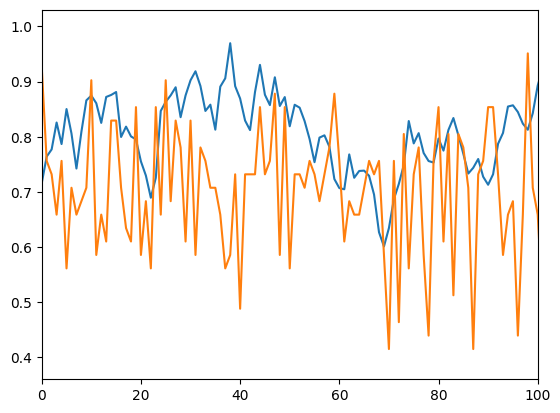

In [16]:
plt.plot(best_voltages[500:,0]/np.max(best_voltages[500:,0]))
plt.plot(I_mean/np.max(I_mean))
plt.xlim(0,100)

(0.0, 100.0)

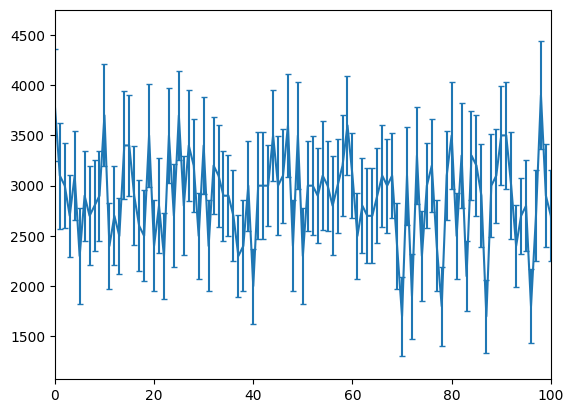

In [17]:
plt.errorbar(np.arange(len(I_mean)), I_mean, I_std, capsize=2)
plt.xlim(0,100)